# Summary
- no known orbital period
- previous inconclusive (/non-radial pulsations rather than orbital period) suggestions of 1.805d, 0.6425 periods (see ATels listed)
- agreed on those values throughout LC (e.g. see periodograms by year) but also not conclusive, esp. with difficulty looking in LC for such low LCs 
- interesting V-I behavior: positive slope with lots of scatter in Iint vs. V-I but V vs. V-I just lots of scatter, no clear relationship
    - V-I (or just V) vs. time helpful for identification of super-orbital trend (i.e. peaks more clear than in I vs. time; spaced by ~1400 days though largest I peaks at beginning and end of LC closer (~1200 days)
- max I mag: 15.663; min: 15.388; so range of 0.275 mags 
- max V mag: 15.742; min: 15.626; so range of 0.116 mags
- significant flare towards end coincides with Type II X-ray outburst
    - similar feature around 2000
- otherwise potential ~sinusoidal super-orbital modulation where amplitude not greater than variability within

**TO DO (Saturday 12/19/20)**
- finish super-orbital based on V-I and I LC
- finish summary
- double check calibration

# Outline
- 1: Sequence of Three Auto Functions that Inform Further Search
- 2: Look for Orbital Period with Periodograms
- 3: Look for Orbital Period with LC
- 4: Look for Super-Orbital Period with Periodograms
- 5: Look for Super-Orbital Period with LC

In [1]:
from uncertainties import ufloat
from uncertainties.umath import *
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.stats import LombScargle
from scipy import signal
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import scipy.optimize
# from lmfit.models import GaussianModel
import glob
from astropy.table import Table,join,vstack,unique
from importlib import reload
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import ogle as o #module

blue = 'cornflowerblue'
navy = 'navy'
purple = 'rebeccapurple'
pink = '#CF6275'
maroon = 'maroon'

In [2]:
cross = Table.read('sourcefiles.csv')
full = Table.read('smc_x_m03_zar_match_OGLE_v2.ascii',format='ascii')
orb = float(cross[cross['src_n']==5]['Porb'])
orb

nan

In [3]:
#I calibration
icalib = Table.read('smc_list/OGLE-IV/I/CALIB.list',format='ascii')

In [4]:
icalib[:2]

col1,col2
str15,float64
smc713.08.444,0.072
smc718.01.10792,-0.017


In [5]:
full[[full['src_n']==5]]

src_n,OGLE,RA_OGLE,DEC_OGLE,ra_deg,dec_deg,perr,period,Porb,_RAJ2000_1,_DEJ2000_1,__M2002_,Vmag_1,Separation_1,_RAJ2000_2,_DEJ2000_2,Vmag_2,recno,Separation
int64,str38,str11,str11,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64
5,SMC719.21 \#22049,00:51:38.79,-72:17:04.8,12.91333,-72.28433,1.4,4.78,--,--,--,--,--,--,--,--,--,--,--


- no known orbital period? searching
- SXP 4.78
- ATel #12229: 1.805d
- ATel #12920: 0.5827 +/- 0.0014 d strong for a season; also sometimes see one above but inconclusive

In [6]:
#set orb to 1.805 but no need to use in all functions
orb = 1.805

# 1: Sequence of Three Auto Functions that Inform Further Search

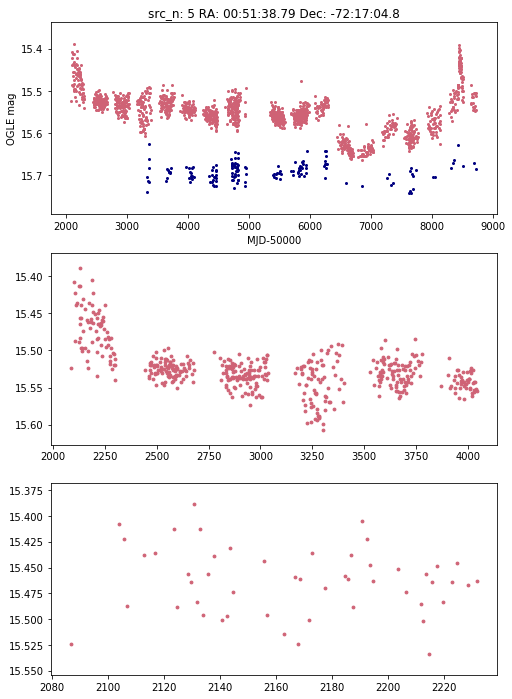

In [7]:
ilist,vlist = o.getIV(5,cross,plot=True,zooms=True,figsize=(8,12),mult=(3,8),offset=10,stack=False) #sometimes good to adjust offset
iband,vband = vstack(ilist),vstack(vlist)

In [8]:
idays = iband['MJD-50000']
imag = iband['I mag']
ierr = iband['I mag err']

In [9]:
len(iband)/10

153.0

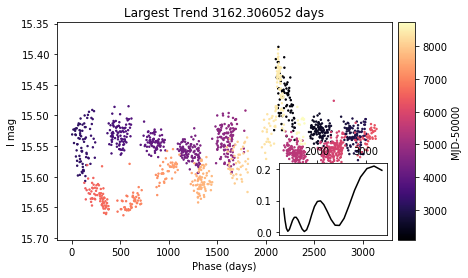

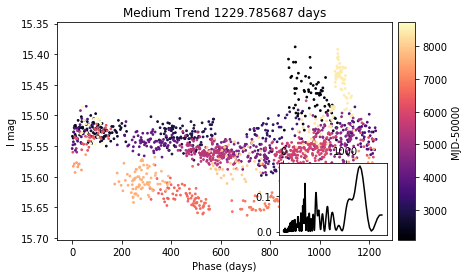

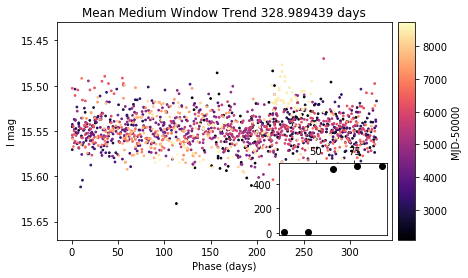

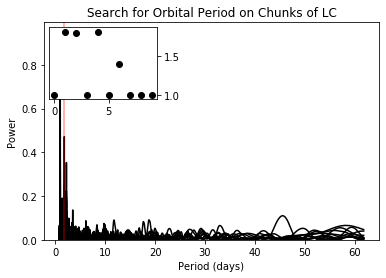

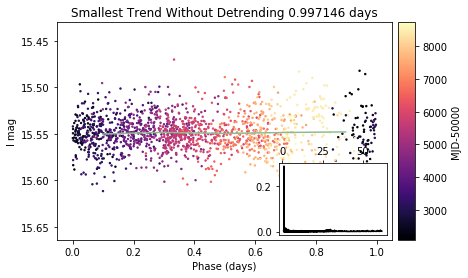

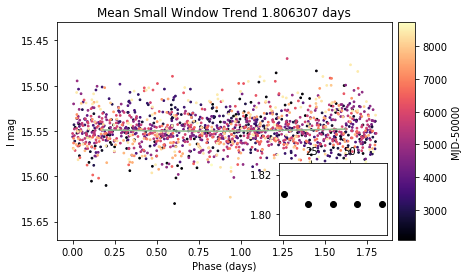

In [10]:
reload(o)
o.autopd(iband,orb,plotpd=True,plotphase=True,printall=False,ctime=True,orb_bounds=(1,60),cutlc=True,numcuts=10,plotdet=True,pbins=5,saveall=False,srcnum=3)

**some support of ~1.805d period**

I and V-I correlation: -0.6677821537439047
V and V-I correlation: 0.17975703286765632


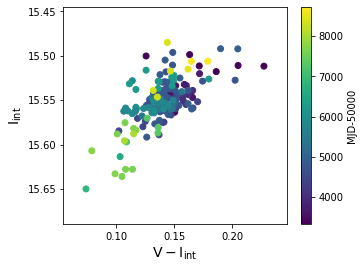

In [11]:
reload(o)
interp = o.colormag(iband,vband,ctime=True,retint=True) 

Text(0.5, 0, 'V-I')

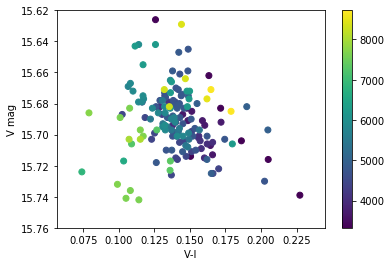

In [12]:
#V vs. V-I
plt.scatter(vband['V mag']-interp,vband['V mag'],c=vband['MJD-50000'])
plt.colorbar()
plt.ylabel('V mag')
plt.ylim(15.76,15.62)
plt.xlabel('V-I')

approximate spacing for now but something to be said for peaks in V-I vs. time; also show up in I band LC
- especially interesting behavior on final flare

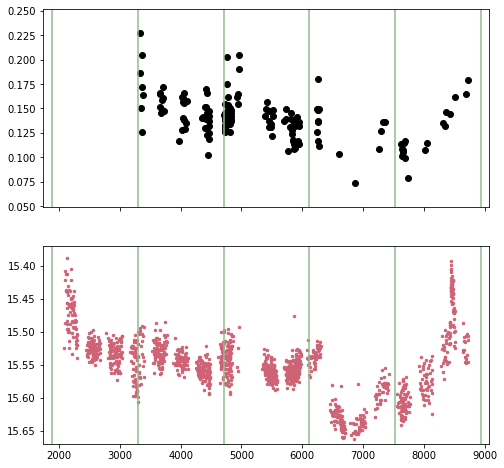

In [13]:
# V-I vs. time
fig,ax = plt.subplots(2,1,figsize=(8,8),sharex=True)
ax[0].scatter(vband['MJD-50000'],vband['V mag']-interp,color='black')
# plt.colorbar(label=('I mag'))
ax[1].scatter(idays,imag,color=pink,s=6)
ax[1].set_ylim(15.67,15.37)
for i in range(-1,5):
    ax[0].axvline(3300+1410*i,color='darkseagreen')
    ax[1].axvline(3300+1410*i,color='darkseagreen')


# 2: Look for Orbital Period with Periodograms

by OGLE epoch then dense regions (but can be broken up by >20 days)

In [14]:
len(ilist)

2

start ind: 0, end ind: -1
start ind: 0, end ind: -1


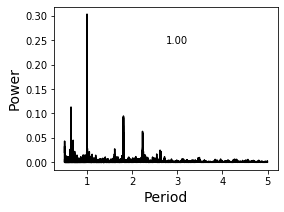

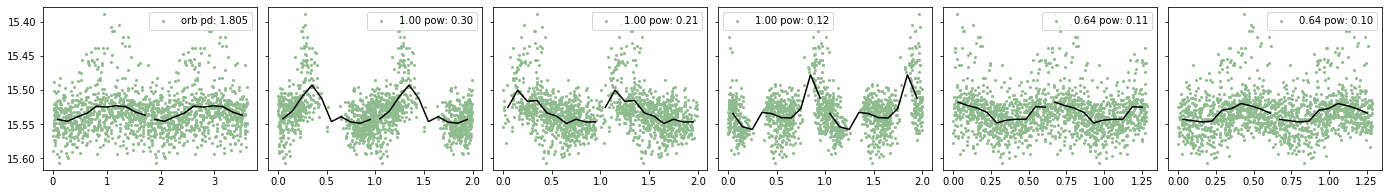

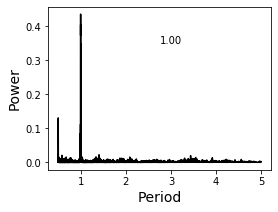

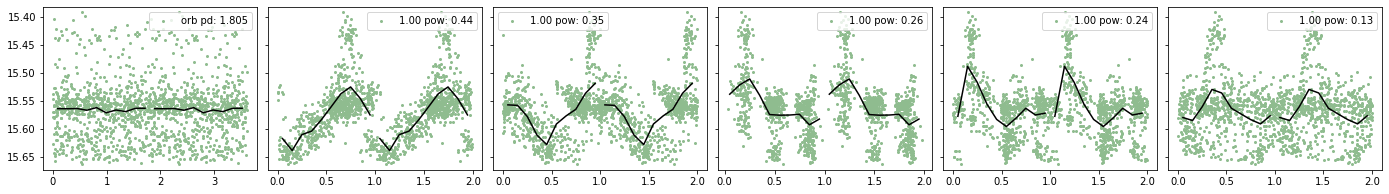

In [15]:
#did wider search but peaks here
reload(o)
pf1 = o.multiphase(ilist[0],orb=orb,dense=False,minp=0.5,maxp=5,plotpd=True,pkorder=True)
pf2 = o.multiphase(ilist[1],orb=orb,dense=False,minp=0.5,maxp=5,plotpd=True,pkorder=True)

- 1.805 strong in first but not second
- 0.6425 found by ATel

In [16]:
pf1[4:10]

,period,power
145,0.643045,0.096141
31,1.805313,0.094860
84,0.994815,0.080341
147,0.641931,0.075843
32,1.801552,0.075342
144,0.643523,0.064292


In [17]:
pf2[:10] #OIV -- just day and half day

,period,power
75,0.996920,0.435471
72,1.000316,0.347726
74,0.998157,0.262749
73,0.999102,0.239349
71,1.001918,0.131349
168,0.500771,0.130618
170,0.500096,0.125922
70,1.003139,0.124276
76,0.995362,0.111921
169,0.500370,0.106061


<Quantity 0.61581475>

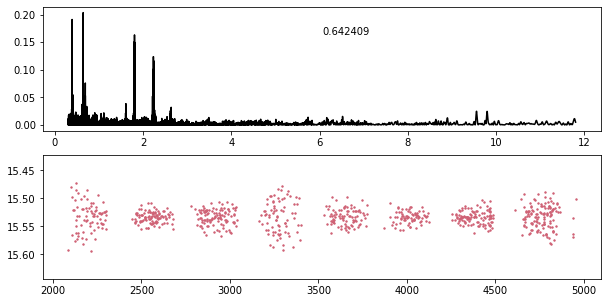

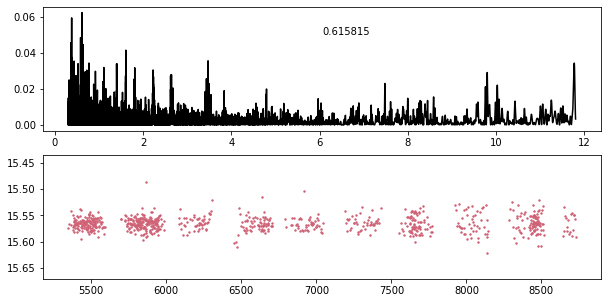

In [18]:
#detrending each OGLE epoch
#varies just a bit based on window
o.knownorb(ilist[0],orb,lower=1.5,upper=10,window=11,cutdata=False,cut1=0,cut2=500,plotdet=True,figsize=(10,5))
o.knownorb(ilist[1],orb,lower=1.5,upper=10,window=11,cutdata=False,cut1=0,cut2=500,plotdet=True,figsize=(10,5))

**separate into regions**

start ind: 905, end ind: 1079


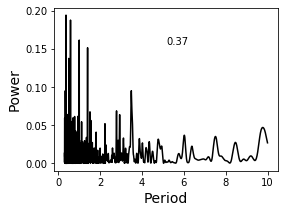

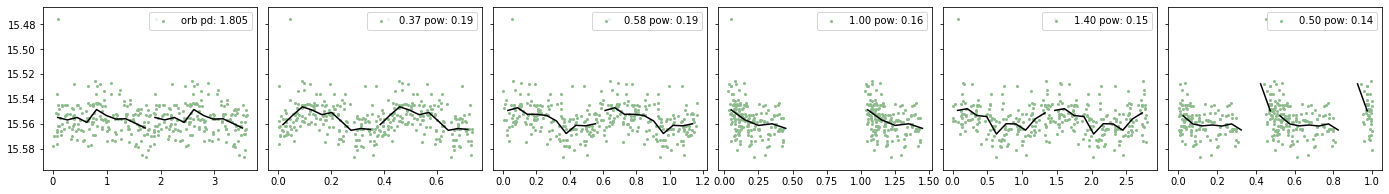

In [19]:
#search and fold with densest region (max space up to 50 points)
df,pks = o.multiphase(iband,orb=orb,dense=True,maxspace=50,minp=0.3,maxp=10,plotpd=True)

In [20]:
dense,mdense = o.finddense(iband,maxspace=50,retall=True)

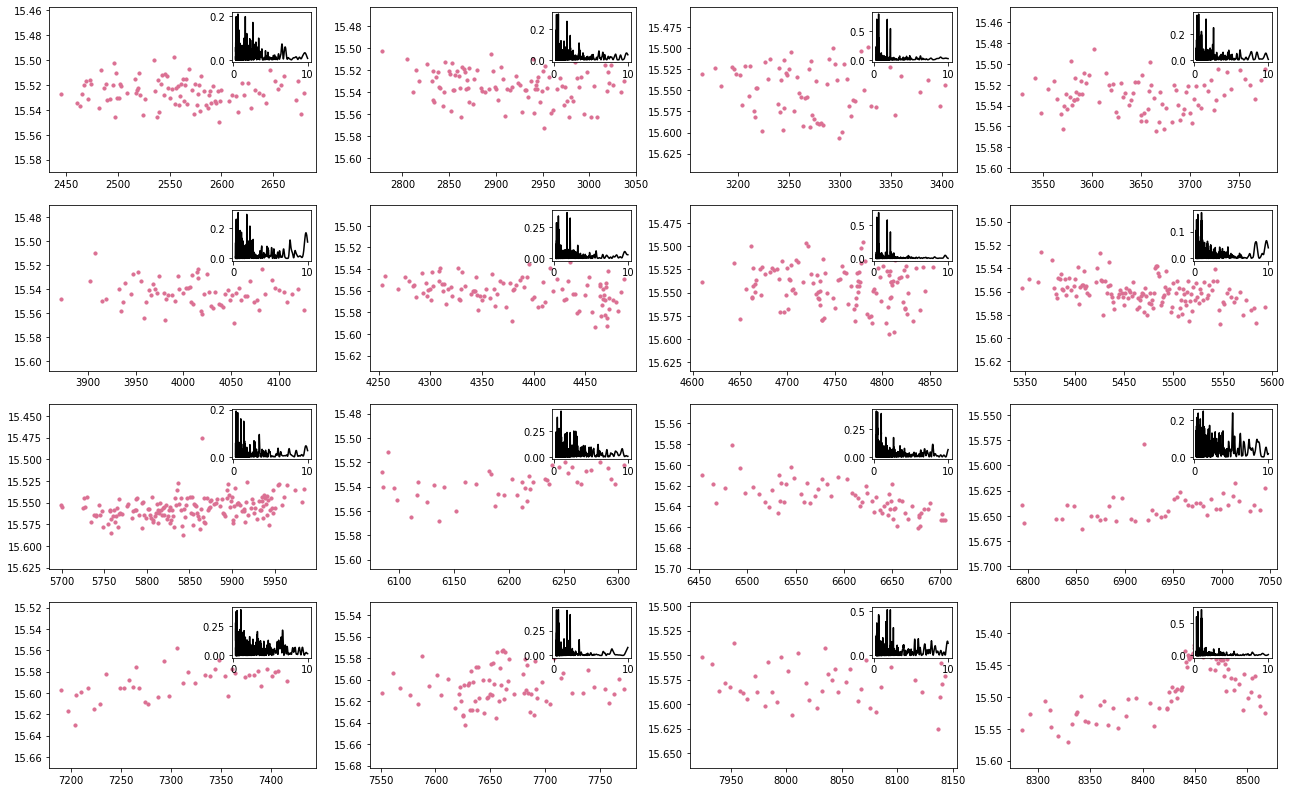

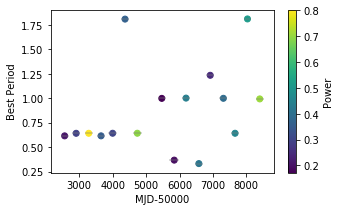

In [21]:
bps,maxpows,stdate,endate = o.denselcpd(iband,dense,minp=0.3,maxp=10,plotbest=True,onlybp=True)

In [22]:
bps

[0.6160010987004231,
 0.6422216562040246,
 0.6424436908170391,
 0.6161664261778323,
 0.6427451187866026,
 1.8099566295559246,
 0.6428889759665449,
 0.9994192387470751,
 0.3679111660210836,
 1.0021579854575078,
 0.3324805960066025,
 1.235416803253838,
 1.0001201234539443,
 0.6425740893189699,
 1.8116967392601753,
 0.9938201086749439]

#### by year
- **to do: make year periodogram function**

In [23]:
#make tab for each year in LC
years = []
stdate = iband['MJD-50000'][0]
endate = iband['MJD-50000'][-1]
y = 1
while y < int((endate-stdate)/365)+1:
    #less than next year
    year = iband[iband['MJD-50000']<stdate+365*y]
    #also more than previous
    year = year[year['MJD-50000']>stdate+365*(y-1)]

    years.append(year)
    y+=1

many have peak near 1.805 and 0.6425

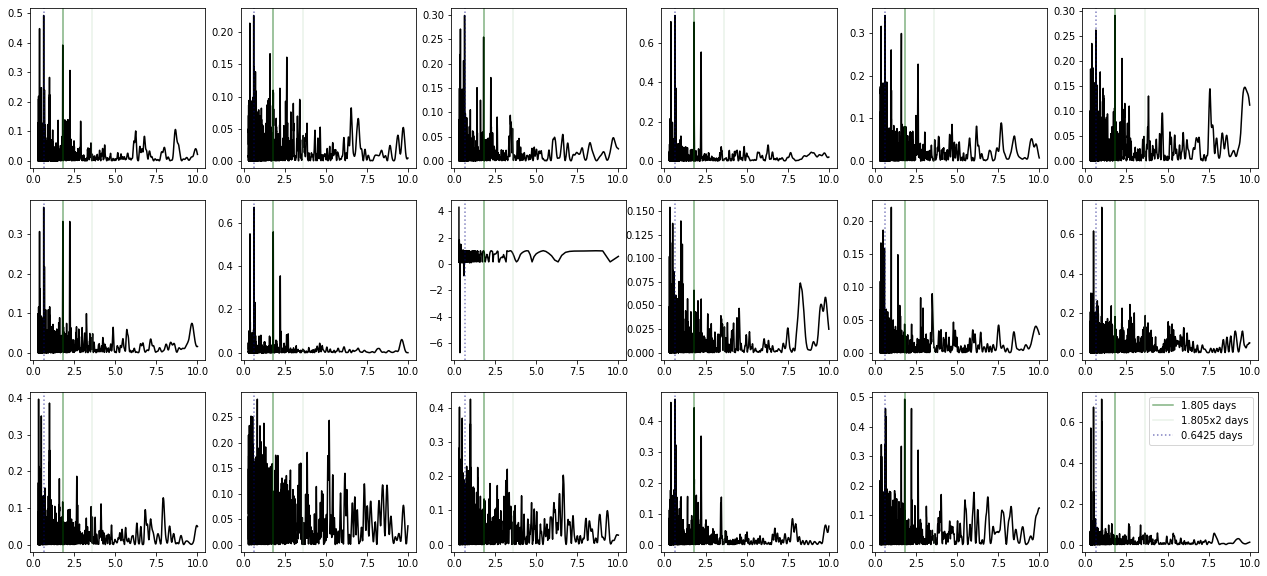

In [24]:
#with multiphase big cell but nice to see what fold of known orb looks like even when it's not a peak
reload(o)
fig = plt.figure(figsize=(22,10))
bps = []
p = 1
for y in years:
    freq,power,bp = o.periodogram(y,minp=0.3,maxp=10,more=True,plot=False)
    bps.append(float(bp))
    ax = fig.add_subplot(3,6,p)
    ax.plot(1/freq,power,color='black')
    ax.axvline(orb,color='darkgreen',alpha=0.5,label='1.805 days')
    ax.axvline(orb*2,color='darkseagreen',alpha=0.2,label='1.805x2 days')

    ax.axvline(0.6425,color='navy',linestyle='dotted',alpha=0.5,label='0.6425 days')

    p+=1
ax.legend()

Text(0.5, 0, 'Year')

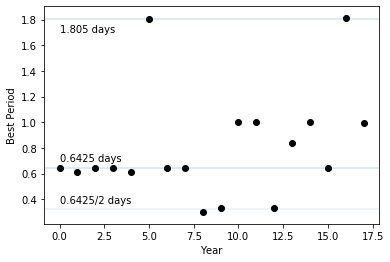

In [25]:
plt.scatter(np.arange(18),bps,color='black')
plt.axhline(0.6425,alpha=0.2)
plt.text(0,0.7,'0.6425 days')
plt.axhline(0.6425/2,alpha=0.1)
plt.text(0,0.37,'0.6425/2 days')
plt.text(0,1.7,'1.805 days')
plt.axhline(1.805,alpha=0.2)
plt.ylabel('Best Period')
plt.xlabel('Year')

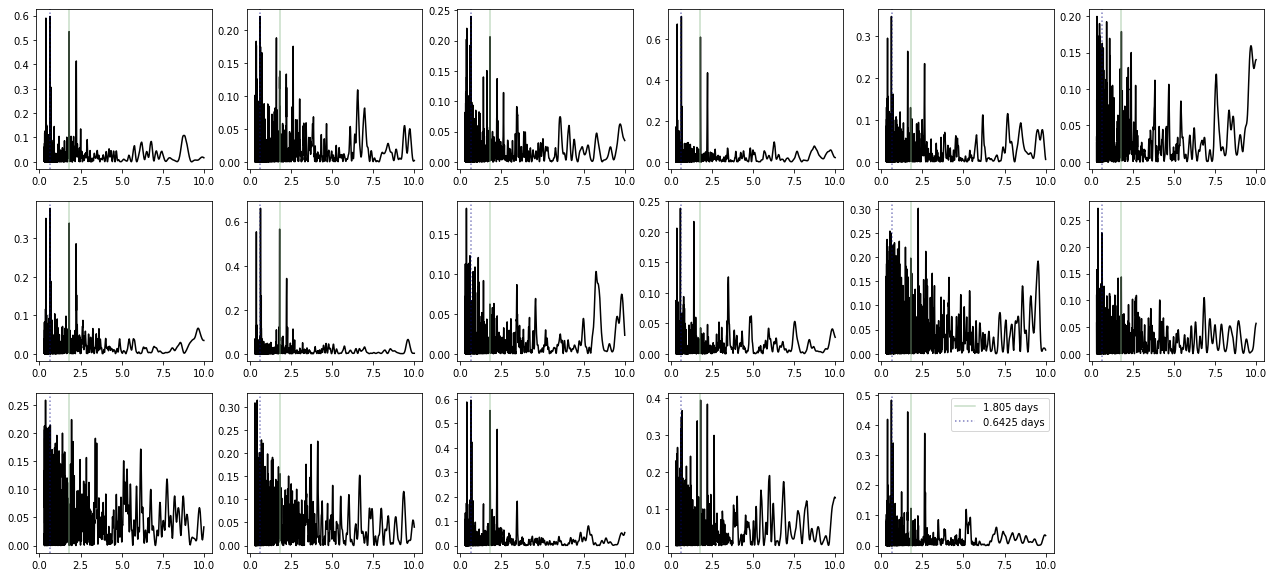

In [26]:
#repeat with detrending -- can adjust window size and then more years will have enough points
reload(o)
fig = plt.figure(figsize=(22,10))
bps = []
p = 1
for y in years:
    if len(y)>7:
        o.detrend(y,window=7)
        freq,power,bp = o.periodogram(y,minp=0.3,maxp=10,more=True,plot=False,det=True)
        bps.append(float(bp))
        ax = fig.add_subplot(3,6,p)
        ax.plot(1/freq,power,color='black')
        ax.axvline(orb,color='darkseagreen',alpha=0.5,label='1.805 days')
        ax.axvline(0.6425,color='navy',linestyle='dotted',alpha=0.5,label='0.6425 days')
        p+=1
ax.legend()

Text(0.5, 0, 'Year')

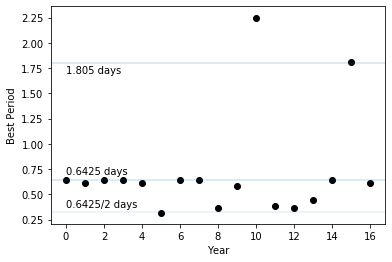

In [27]:
plt.scatter(np.arange(17),bps,color='black')
plt.axhline(0.6425,alpha=0.2)
plt.text(0,0.7,'0.6425 days')
plt.axhline(0.6425/2,alpha=0.1)
plt.text(0,0.37,'0.6425/2 days')
plt.text(0,1.7,'1.805 days')
plt.axhline(1.805,alpha=0.2)
plt.ylabel('Best Period')
plt.xlabel('Year')

# repeat search by year but looking for larger periodicities

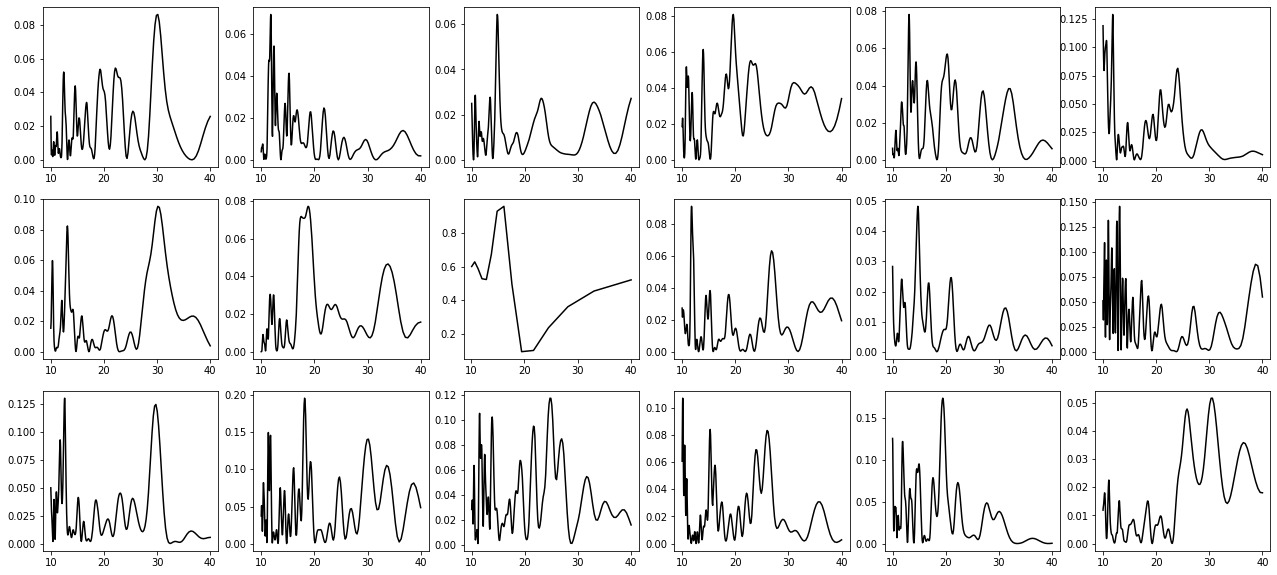

In [28]:
#no detrending but look for larger periodicity
fig = plt.figure(figsize=(22,10))
bps = []
p = 1
for y in years:
    freq,power,bp = o.periodogram(y,minp=10,maxp=40,more=True,plot=False)
    bps.append(float(bp))
    ax = fig.add_subplot(3,6,p)
    ax.plot(1/freq,power,color='black')
#     ax.axvline(orb,color='darkgreen',alpha=0.5,label='1.805 days')
#     ax.axvline(orb*2,color='darkseagreen',alpha=0.2,label='1.805x2 days')

#     ax.axvline(0.6425,color='navy',linestyle='dotted',alpha=0.5,label='0.6425 days')

    p+=1


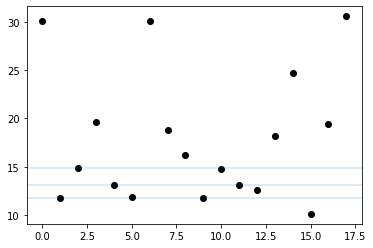

In [29]:
plt.scatter(np.arange(18),bps,color='black')
plt.axhline(11.781800912086739,alpha=0.2)
plt.axhline(14.814574361368395,alpha=0.2)
plt.axhline(13.115,alpha=0.2)


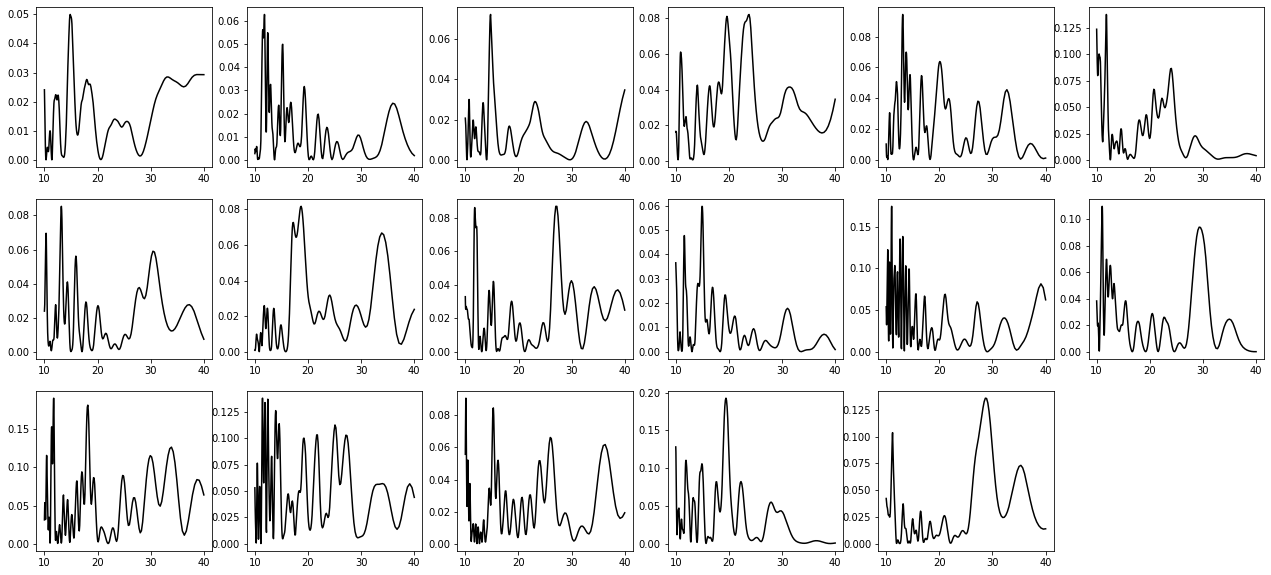

In [30]:
reload(o)
fig = plt.figure(figsize=(22,10))
bps = []
p = 1
for y in years:
    if len(y)>31:
        o.detrend(y,window=31)
        freq,power,bp = o.periodogram(y,minp=10,maxp=40,more=True,plot=False,det=True)
        bps.append(float(bp))
        ax = fig.add_subplot(3,6,p)
        ax.plot(1/freq,power,color='black')

        p+=1


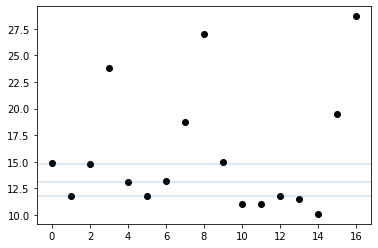

In [31]:
plt.scatter(np.arange(17),bps,color='black')
plt.axhline(11.781800912086739,alpha=0.2)
plt.axhline(14.814574361368395,alpha=0.2)
plt.axhline(13.115,alpha=0.2)

**in LC, look for 11.8, 14.8, and 13.1 days**

# 3: Look for Orbital Period with LC

In [32]:
orb

1.805

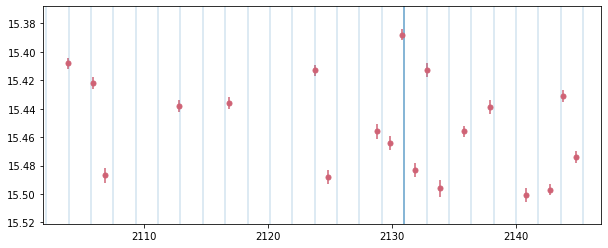

In [33]:
def checkorb(st,end,cen=2131,orb=orb,plcen=False,figsize=(10,4)):
    stday = idays[st:st+1]
    enday = idays[end-1:end]
    fig = plt.figure(figsize=figsize)
    plt.errorbar(idays[st:end],imag[st:end],yerr=ierr[st:end],linestyle='none',marker='o',color=pink,markersize=5)
    maxi,mini = np.max(imag[st:end]),np.min(imag[st:end])
    plt.ylim(maxi+.02,mini-.02)

    fline = int((stday - cen)/orb)
    lline = int((enday - cen)/orb)
    for i in range(fline-1,lline+2):
        plt.axvline(cen+orb*i,alpha=0.2)
    if plcen: plt.axvline(cen,alpha=0.6)
checkorb(1,20,plcen=True)

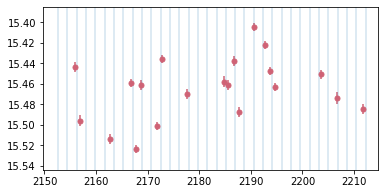

In [34]:
checkorb(20,40,figsize=(6,3)) 

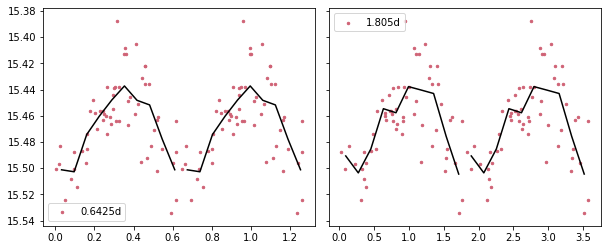

In [35]:
def checkpds(st,end,pd1=0.6425,pd2=1.805,det=False,window=7,pbins=10):
    fig,ax = plt.subplots(1,2,figsize=(10,4),sharey=True)
    ttab = iband[st:end]
    if det:
        o.detrend(ttab,window=window)
        mag = ttab['I detrend']
    else: mag = ttab['I mag']
    days = ttab['MJD-50000']
    ax[0].scatter(days%pd1,mag,color=pink,label=str(pd1)+'d',s=6)
    ax[1].scatter(days%pd2,mag,color=pink,label=str(pd2)+'d',s=6)
    ax[0].scatter(pd1+days%pd1,mag,color=pink,s=6)
    ax[1].scatter(pd2+days%pd2,mag,color=pink,s=6)
    maxi,mini = np.max(mag[st:end]),np.min(mag[st:end])
    ax[0].set_ylim(maxi+.01,mini-.01)
    plt.subplots_adjust(wspace=0.05)
    ax[0].legend()
    ax[1].legend()
    
    mid,avg = o.meanphase(ttab,pd1,det=det,pbins=pbins)
    ax[0].plot(mid,avg,color='black',label=str(pd)+'d')
    ax[0].plot(pd1+mid,avg,color='black')

    mid,avg = o.meanphase(ttab,pd2,det=det,pbins=pbins)
    ax[1].plot(mid,avg,color='black',label=str(pd2)+'d')
    ax[1].plot(pd2+mid,avg,color='black')
checkpds(0,60)

<Quantity 0.64259922>

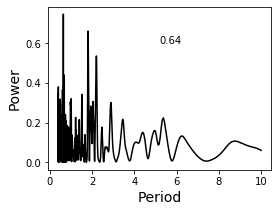

In [36]:
o.periodogram(iband[20:40],minp=0.4,maxp=10)

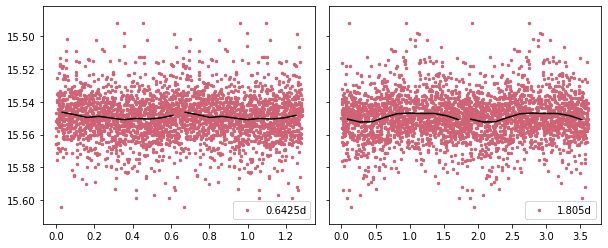

In [37]:
checkpds(0,-1,pd1=0.6425,pd2=1.805,det=True,window=3)

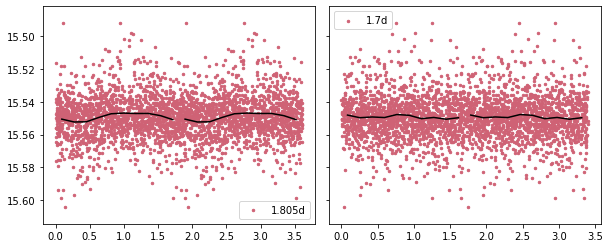

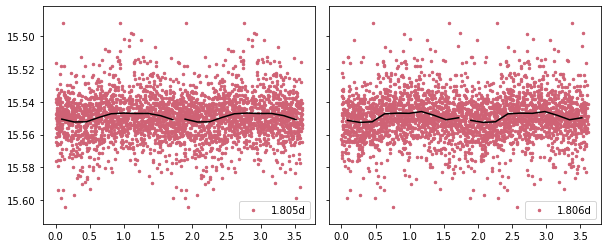

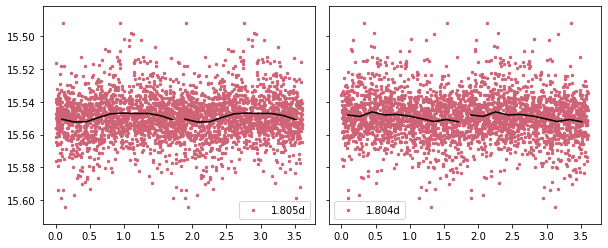

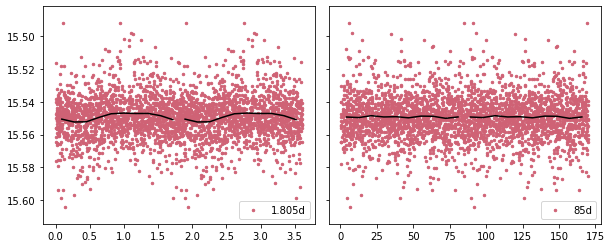

In [38]:
#compare to nearby periods
checkpds(0,-1,pd1=1.805,pd2=1.7,det=True,window=3)
checkpds(0,-1,pd1=1.805,pd2=1.806,det=True,window=3)
checkpds(0,-1,pd1=1.805,pd2=1.804,det=True,window=3)
checkpds(0,-1,pd1=1.805,pd2=85,det=True,window=3)

#### similar to ATel, certainly signal at these two periods fairly consistently but not sure if I can conclude anything, especially without being able to easily check with the LC itself

### evidence of other periodicity in LC?
- not seeing much in phase-folded data for periods suggested in previous section

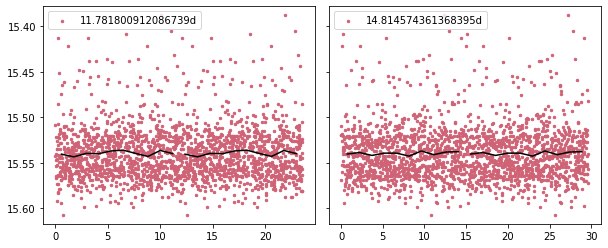

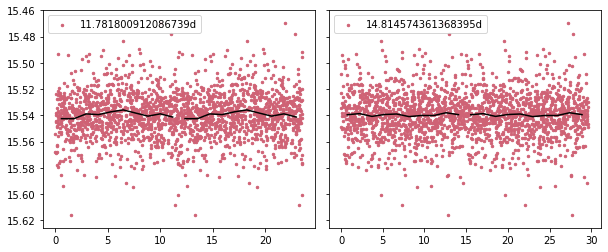

In [39]:
checkpds(0,1000,pd1=11.781800912086739,pd2=14.814574361368395,det=False,window=3)
checkpds(0,1000,pd1=11.781800912086739,pd2=14.814574361368395,det=True,window=31)
#14.814574361368395

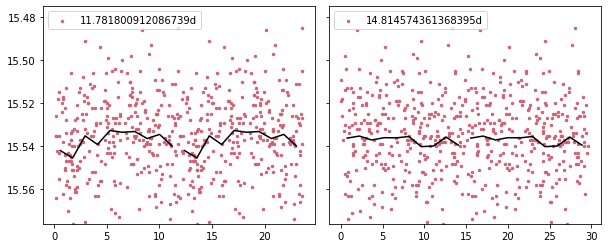

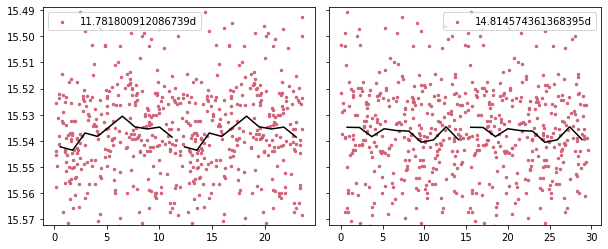

In [40]:
checkpds(200,500,pd1=11.781800912086739,pd2=14.814574361368395,det=False,window=3)
checkpds(200,500,pd1=11.781800912086739,pd2=14.814574361368395,det=True,window=21)
#14.814574361368395

# 4: Look for Super-Orbital Period with Periodograms

<Quantity 1130.55340827>

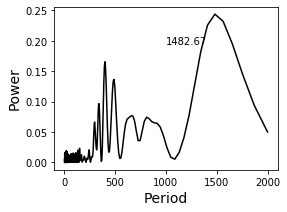

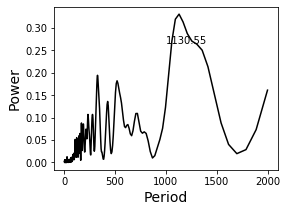

In [41]:
#each OGLE epoch
o.periodogram(ilist[0],maxp=2000)
o.periodogram(ilist[1],maxp=2000)

start ind: 0, end ind: -1


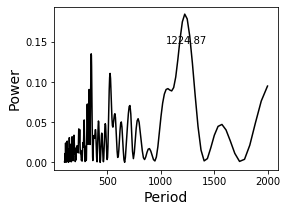

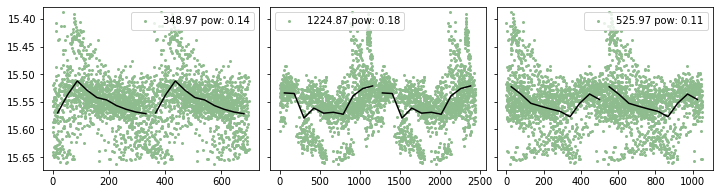

In [42]:
#full LC
df,pks = o.multiphase(iband,orb=orb,incl_orb=False,dense=False,minp=100,maxp=2000,plotpd=True)

# 5: Look for Super-Orbital Period with LC

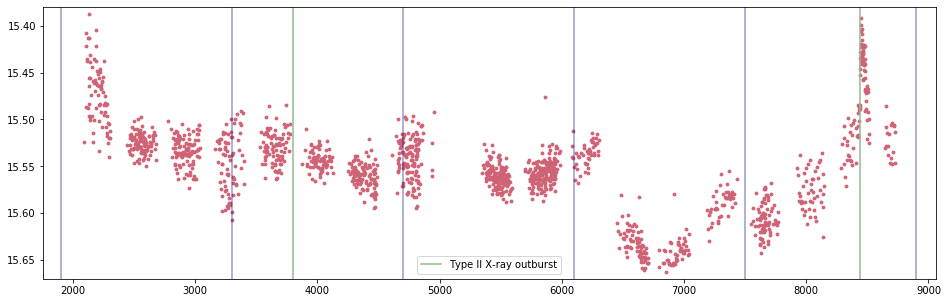

In [43]:
plt.figure(figsize=(16,5))
plt.scatter(idays,imag,color=pink,s=8)
plt.ylim(15.67,15.38)
plt.axvline(8438,color='darkseagreen',label='Type II X-ray outburst')
plt.axvline(3800,color='darkseagreen')

plt.legend()

for i in range(-1,5):
    plt.axvline(3300+1400*i,color='navy',alpha=0.4)
#     plt.axvline(3300+1300*i,color='cornflowerblue',linestyle='dotted')

# plt.axvline(5400,color='darkseagreen')

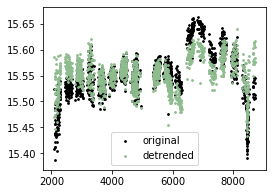

In [44]:
o.detrend(iband,window=401,plot=True)

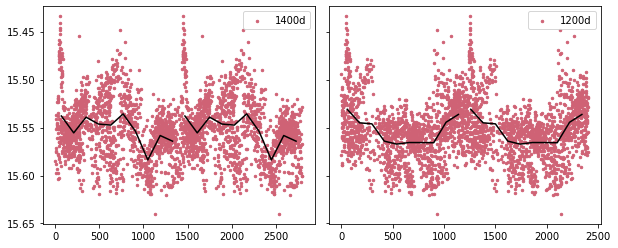

In [45]:
checkpds(0,-1,pd1=1400,pd2=1200,det=True,window=401)
# checkpds(0,-1,pd1=1400,pd2=1200,det=False,window=401)

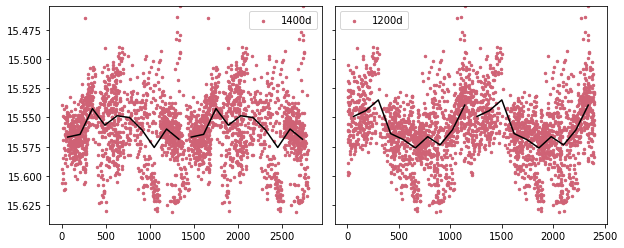

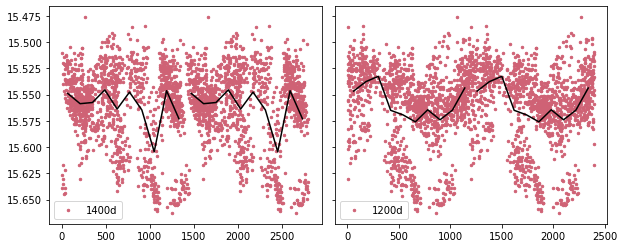

In [46]:
#without first and last flares
checkpds(100,-100,pd1=1400,pd2=1200,det=True,window=401)
checkpds(100,-100,pd1=1400,pd2=1200,det=False,window=401)

see to-dos at top